# Model v0.2 (Sid edited this) 
# Returns used instead of prices

In [2]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split



In [3]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = [] 

In [4]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week6


In [5]:
# Uses the input file generated from preprocessing
input_file ='input_model.csv'

input_data = pd.read_csv(input_file)
input_data

,Unnamed: 0,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Returns
0,1,IL,2001,FEB,81.370370,56.923657,27.555556,68.074074,48.770203,17.518519,...,0.000000,26.148148,6.729626,1.079630,5,5,3,2,2.00,0.015114
1,2,IL,2001,MAR,78.981481,54.888140,28.592593,65.148148,44.410042,17.962963,...,0.111111,27.240741,7.065699,0.931111,9,2,1,2,2.00,0.000000
2,3,IL,2001,ARP,82.537037,55.421243,27.111111,67.555556,43.500810,17.870370,...,0.407407,32.074074,8.908652,1.804444,12,1,1,9,1.86,-0.072571
3,4,IL,2001,MAY,79.648148,53.920507,26.870370,63.555556,42.912003,15.333333,...,0.148148,33.648148,8.241042,1.573519,19,2,3,7,1.83,-0.016261
4,5,IL,2001,JUN,78.481481,52.742758,22.462963,64.518519,44.106178,15.703704,...,0.037037,30.518519,7.494410,1.603519,14,5,3,5,1.95,0.063513
5,6,IL,2001,JUL,91.952381,68.722965,42.285714,76.619048,59.794316,32.238095,...,0.000000,27.095238,6.017819,1.845238,10,4,2,8,1.99,0.020305
6,7,IL,2001,AUG,94.142857,73.225346,29.571429,78.428571,65.106759,26.285714,...,0.000000,25.142857,5.075115,3.201429,7,0,3,5,1.94,-0.025447
7,8,IL,2001,SEP,89.000000,64.071264,36.285714,73.000000,53.571757,26.285714,...,0.142857,26.285714,6.323481,1.488571,6,0,3,2,1.85,-0.047502
8,9,IL,2001,OCT,84.000000,53.721278,27.285714,65.714286,42.291753,19.571429,...,0.000000,33.571429,9.025425,2.652857,7,0,1,2,1.91,0.031918
9,10,IL,2001,NOV,73.571429,49.766667,24.714286,59.857143,39.038095,19.571429,...,0.000000,38.142857,9.090476,1.374286,6,0,1,1,2.06,0.075603


In [8]:
# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)

# rename UNNAMED:0 to INDEX
input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('UNNAMED: 0.1', axis=1)

input_data.head()


,INDEX,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,RETURNS
0,1,IL,2001,FEB,81.370370,56.923657,27.555556,68.074074,48.770203,17.518519,...,0.000000,26.148148,6.729626,1.079630,5,5,3,2,2.00,0.015114
1,2,IL,2001,MAR,78.981481,54.888140,28.592593,65.148148,44.410042,17.962963,...,0.111111,27.240741,7.065699,0.931111,9,2,1,2,2.00,0.000000
2,3,IL,2001,ARP,82.537037,55.421243,27.111111,67.555556,43.500810,17.870370,...,0.407407,32.074074,8.908652,1.804444,12,1,1,9,1.86,-0.072571
3,4,IL,2001,MAY,79.648148,53.920507,26.870370,63.555556,42.912003,15.333333,...,0.148148,33.648148,8.241042,1.573519,19,2,3,7,1.83,-0.016261
4,5,IL,2001,JUN,78.481481,52.742758,22.462963,64.518519,44.106178,15.703704,...,0.037037,30.518519,7.494410,1.603519,14,5,3,5,1.95,0.063513


In [22]:
# List of column names
col_names = list(input_data)

# List all column types
#input_data.dtypes


print("Shape of Original data: {}".format(input_data.shape) + "\n")

input_variables = input_data.iloc[:,4:]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

price = input_data.iloc[:,26]
returns = input_data.iloc[:,27]



Shape of Original data: (191, 28)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'RETURNS'],
      dtype='object')

Shape of variable data: (191, 24)



In [10]:
print(input_data.columns)

Index(['INDEX', 'STATE', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW',
       'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW',
       'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG',
       'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM', 'PRICE',
       'RETURNS'],
      dtype='object')


## Linear Regression


## Visualizing the important characteristics

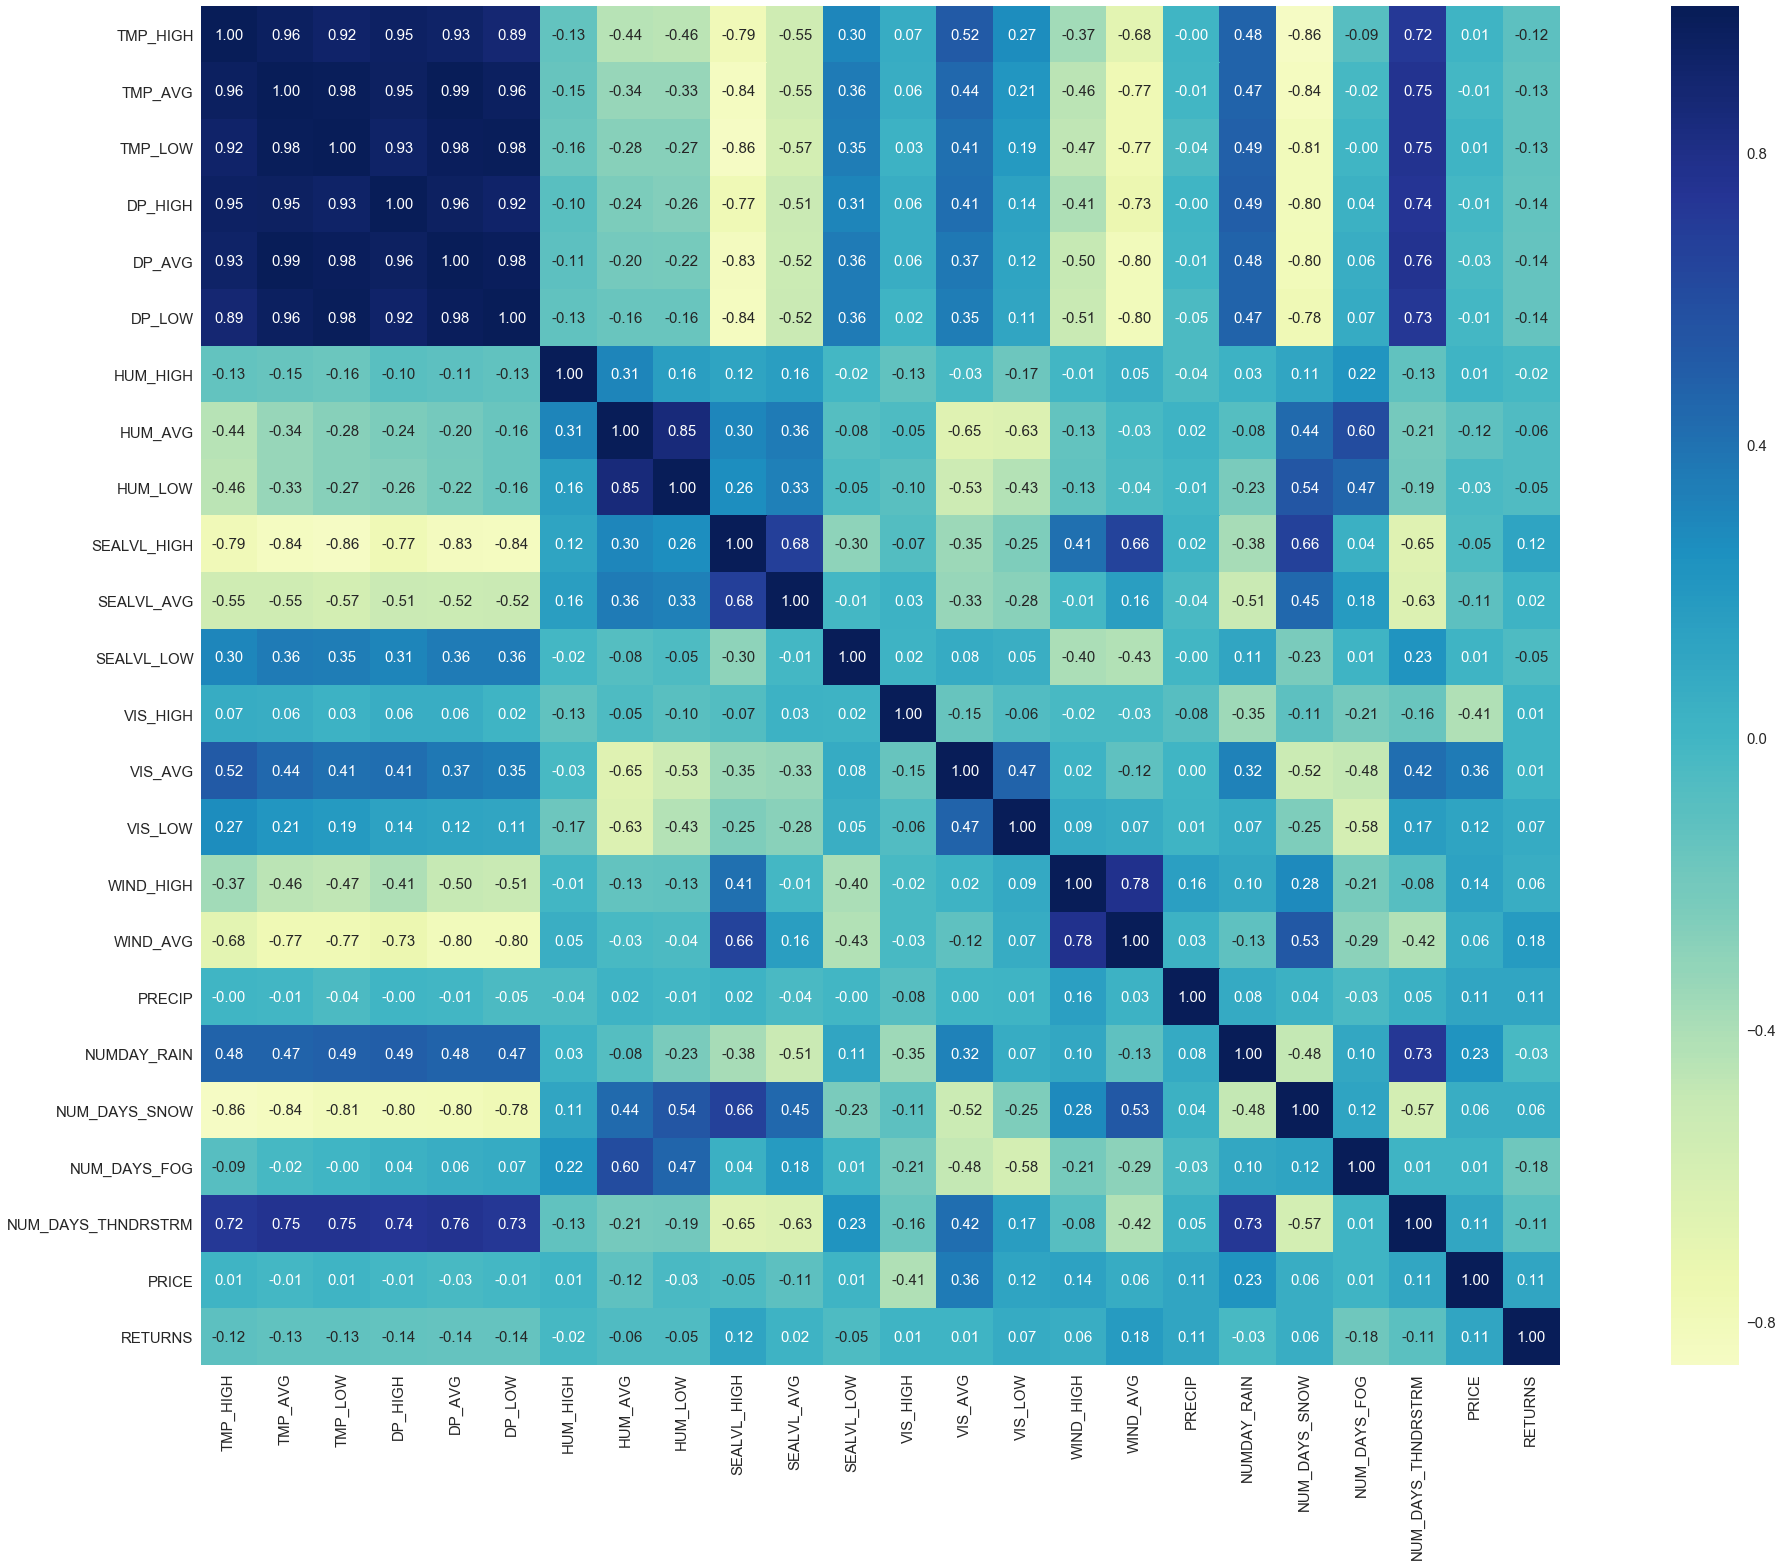

In [23]:
# Plot the correlation matrix 
correlation_matrix = np.corrcoef(input_variables.values.T)
heat_map_column_names = col_names = list(input_variables)
sns.set(font_scale = 1.5)
plt.figure(figsize = (40,25))
hm = sns.heatmap(correlation_matrix,
    cbar=True,
    annot=True,
    cmap = "YlGnBu",             
    center = 0,             
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=heat_map_column_names,
    xticklabels=heat_map_column_names)
plt.show()

In [34]:
# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], returns, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(152, 22) (152,)
(39, 22) (39,)


### Simple Linear Regression

In [35]:
# regression libraries
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_{}: ".format(lr.coef_))
print("\n" + "lr_intercept_{}".format(lr.intercept_))

lr.coef_[ -3.56687300e-03  -2.70752418e-02  -2.46694536e-03  -9.00502427e-05
   3.02752251e-02   3.54510673e-03   8.64147991e-03  -1.62976524e-02
  -2.86229331e-03   7.08997138e-02  -7.67029028e-02   7.26090537e-03
  -4.24695764e-03  -1.12515456e-02  -1.02841014e-02  -6.72605367e-03
   2.31505796e-02   2.36650404e-03  -3.47271137e-04  -7.15277833e-04
  -7.72966036e-04  -1.24813963e-03]: 

lr_intercept_0.9513840005353768


In [36]:
# Train and Test Performance
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))

# Store Result and Model Name
model_results.append(lr.score(X_test,y_test))
model_name.append("Linear")

Training set score: 0.184041
Test set score: -0.351699


### Ridge Regression

In [37]:
# Coefficients should be close to zero

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge.score(X_test,y_test))
model_name.append("Ridge")


Training set score: 0.18
Test set score: -0.33


In [38]:
# Try with some handpicked alpha values
# Note: Higher alpha decerease training test performance but increases generalization

ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_train, y_train)))
print("Test_ridge_0.1 set score: {:.2f}".format(ridge_01.score(X_test, y_test)))
print("\n")

# Store Result and Model Name
model_results.append(ridge_01.score(X_test,y_test))
model_name.append("Ridge_0.1")

ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training_ridge_10 set score: {:.2f}".format(ridge_10.score(X_train, y_train)))
print("Test_ridge_10 set score: {:.2f}".format(ridge_10.score(X_test, y_test)))

# Store Result and Model Name
model_results.append(ridge_10.score(X_test,y_test))
model_name.append("Ridge_10")


Training_ridge_0.1 set score: 0.18
Test_ridge_0.1 set score: -0.35


Training_ridge_10 set score: 0.18
Test_ridge_10 set score: -0.29


### Lasso Regression

In [39]:
# we have large number of features and only a few of them looked important
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso.score(X_test,y_test))
model_name.append("Lasso")

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [40]:
# Setting alpha too low will remove the effect of regularization

lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

# Store Result and Model Name
model_results.append(lasso0001.score(X_test,y_test))
model_name.append("Lasso_0.001")

Training set score: 0.18
Test set score: -0.33
Number of features used: 21


### Elastic Net

In [41]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(enet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(enet.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(enet.coef_ != 0)))

# Store Result and Model Name
model_results.append(enet.score(X_test,y_test))
model_name.append("Elastic Net")

Training set score: 0.06
Test set score: -0.07
Number of features used: 4


#### Plot the regression results

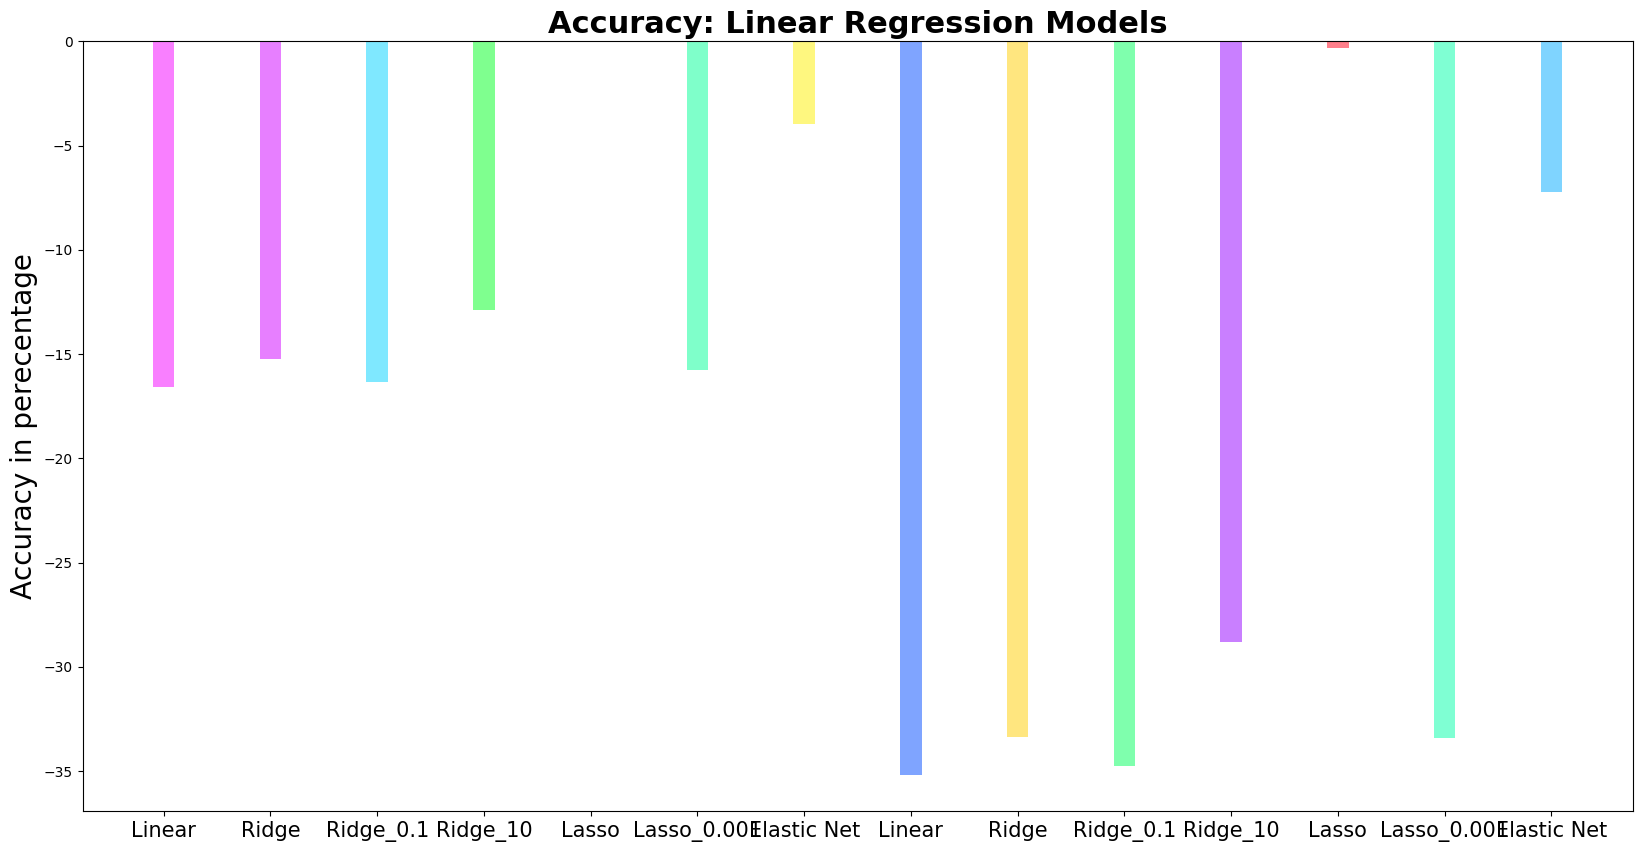

In [42]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (20,10))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.2, color = colors)
plt.xticks(y_pos, model_name, fontsize = 15)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Linear Regression Models', fontsize=22, fontweight='bold')
plt.show()


## Ensemble Methods